In [1]:
from utils import *
krx_list = get_KRX_list()
stock_list = [
    "한미사이언스",
    "한미약품",
    "유한양행",
    "SK바이오팜",
    "씨젠",
    "녹십자",
    "셀트리온제약",
    "SK바이오사이언스",
    "알테오젠",
    "삼성바이오로직스",
    "셀트리온헬스케어",
    "셀트리온",
    "에스디바이오센서"]

# stock Code, Name 추출
df = pd.DataFrame(krx_list)
stock_list = df[df['Name'].isin(stock_list)]
start_date, end_date = '20230101', '20231206'
origin_data = get_dataset(stock_list, start_date, end_date)


In [5]:
df = filter_data(origin_data.copy())
n_recent_days_list = [10, 20, 30]
n_clusters = 5
df = filter_data(df)
# 종가만 사용
df = df[['Name', 'Close']]
# 차분 및 평균, 표준편차
pct = get_pct(df)
data = get_mean_and_std(pct)

# 라벨 데이터셋
df_lables = pd.DataFrame()
df_lables.insert(0, 'Name', data.index)
df_lables.set_index(['Name'], inplace=True)
scaled_df = pd.DataFrame()
for days in n_recent_days_list:
    scaled_df = get_recent_and_window_data(data, n_recent_days=days)
    scaled_df = standard_scaler(scaled_df)
    scaled_df_labels = cosine_kmeans_clustering(data=scaled_df, n_clusters=n_clusters)
    df_lables.insert(0, f'cluster_{days}', scaled_df_labels)

# 클러스터 번호 통일 및 정리
df_lables = unify_cluster_order(df_lables)
df_lables = filter_ambiguous_clusters(df_lables)

# 데이서셋에 클러스터 번호 추가
scaled_df = add_cluster_labels(scaled_df, df_lables)
scaled_df = scaled_df.dropna() # 클러스터번호가 None 삭제

# 소수 클러스터 삭제
scaled_df = filter_clusters(scaled_df)

# 시각화
visualize_clusters(scaled_df, scaled_df['Cluster'])


ValueError: Length of values (2) does not match length of index (13)

In [3]:
df = filter_data(origin_data.copy())
df = df[['Name', 'Close']] # 종가만 사용
rescaled_dataset = standard_scaler(df)

# cosine cluster
cosine_labels = cosine_kmeans_clustering(rescaled_dataset,5)
cosine_cluster = add_cluster_labels(rescaled_dataset, cosine_labels)
# 소수 클러스터 삭제
cosine_cluster = filter_clusters(cosine_cluster)
# 결과 파일로 저장.
cosine_cluster.to_csv('뉴딜지수.csv')


# 시각화
X = labeled_df.copy()
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'AppleGothic' # 한글 깨질 경우. 맥
# plt.rcParams["font.family"] = 'Malgun Gothic' # 한글 깨질 경우. 윈도우
fig, ax = plt.subplots(figsize=(7,7))
plt.scatter(X.values[:, 0], X.values[:, 1], c=X.values[:, 2], cmap='viridis') # data: pandas
ax.set_title('k-Means')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')

# 각 scatter에 이름 명시
for x, y, name in zip(X.iloc[:,0],X.iloc[:,1],X.index):
    label = name
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()


ValueError: Length of values (2) does not match length of index (13)

In [20]:
from utils import *
import matplotlib.pyplot as plt

def get_clustering(stock_list): 
    krx_list = get_KRX_list()

    # stock Code, Name 추출
    df = pd.DataFrame(krx_list)
    stock_list = df[df['Name'].isin(stock_list)]
    start_date, end_date = '20230101', '20231206'
    origin_data = get_dataset(stock_list, start_date, end_date)
    # 보조지표 추가 
    # TA_data = add_technical_indicators(stock_list)

    df = filter_data(TA_data.copy())
    df = df[['Name', 'Close']] # 종가만 사용
    rescaled_dataset = standard_scaler(df)

    # cosine cluster
    cosine_labels = cosine_kmeans_clustering(rescaled_dataset,5)
    cosine_cluster = add_cluster_labels(rescaled_dataset, cosine_labels)
    # 소수 클러스터 삭제
    cosine_cluster = filter_clusters(cosine_cluster)
    # 결과 파일로 저장.
    cosine_cluster.to_csv('뉴딜지수.csv')

    return cosine_cluster

# 시각화
def view_clustering(cosine_cluster):
    
    X = cosine_cluster

    # plt.rcParams["font.family"] = 'AppleGothic' # 한글 깨질 경우. 맥
    plt.rcParams["font.family"] = 'Malgun Gothic' # 한글 깨질 경우. 윈도우
    fig, ax = plt.subplots(figsize=(7,7))
    ax.scatter(X.values[:, 0], X.values[:, 1], c=X.values[:, 2], cmap='viridis') # data: pandas
    ax.set_title('k-Means')
    ax.set_xlabel('Mean Return')
    ax.set_ylabel('Volatility')

    # 각 scatter에 이름 명시
    for x, y, name in zip(X.iloc[:,0],X.iloc[:,1],X.index):
        label = name
        plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

    return fig, ax



c:\Users\Minnie\anaconda3\envs\ai2\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(<Figure size 700x700 with 1 Axes>,
 <Axes: title={'center': 'k-Means'}, xlabel='Mean Return', ylabel='Volatility'>)

c:\Users\Minnie\anaconda3\envs\ai2\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\Users\Minnie\anaconda3\envs\ai2\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


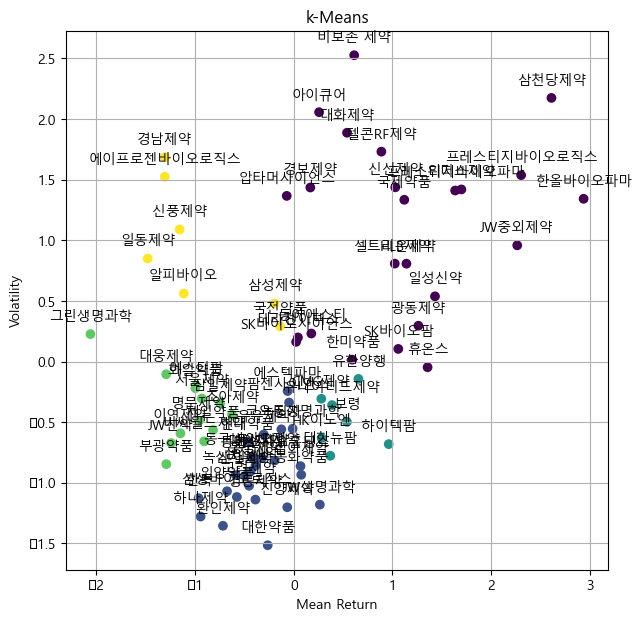

In [15]:
import pandas as pd
stock_list_1=["한미사이언스","한미약품","유한양행","SK바이오팜","씨젠","녹십자","셀트리온제약","SK바이오사이언스",
    "알테오젠","삼성바이오로직스","셀트리온헬스케어","셀트리온","에스디바이오센서"]
stock_list_2=["유유제약","일성신약","국제약품","동아에스티",
    "신신제약","국전약품","한미약품","동아쏘시오홀딩스","JW중외제약","비씨월드제약",
    "명문제약","그린생명과학","위더스제약","JW신약","동화약품","HK이노엔","제일약품","CMG제약","종근당알리코제약","조아제약","대화제약", "동구바이오제약",
    "영진약품안국약품", "압타머사이언스", "이연제약","유나이티드제약","신풍제약","경남제약","고려제약","삼일제약","대웅제약","현대약품","대한뉴팜","서울제약",
    "유한양행","한올바이오파마","녹십자","에스티팜","화일약품","삼진제약","SK바이오팜","일동제약","동국제약","보령","일양약품","진양제약","하이텍팜","테라젠이텍스","삼성제약",
    "SK바이오사이언스","신일제약","경동제약","하나제약","코오롱생명과학","대원제약","셀트리온제약","녹십자웰빙","JW생명과학",
    "에이프로젠바이오로직스","부광약품","환인제약","휴온스","광동제약","아이큐어","대한약품","동성제약","에스텍파마",
    "삼천당제약","삼성바이오로직스","텔콘RF제약","삼아제약","한독","팜젠사이언스","비보존 제약","알피바이오","프레스티지바이오로직스",
    "HLB제약","프레스티지바이오파마","경보제약"]
stock_list_3=["나이벡","동아에스티","한미약품","펩트론","종근당","대화제약","유한양행","대웅제약","한국비엔씨","일동제약",
    "라파스","올릭스","인벤티지랩","대봉엘에스","센트리온제약","대원제약","DXVX","LG화학","큐라티스","HLB제약","애니젠"]
stock_list_4=["파멥신","헬릭스미스","동아에스티","티움바이오","한올바이오파마","제넥신","유한양행","엔케이맥스",
    '에이비엘바이오',"안국약품","영진약품","앱클론","메드팩토","오스코텍","네오이뮨텍","지씨셀",
    "셀리드","이수앱지스","차바이오텍","박셀바이오","바이젠셀","에스티큐브","CG인바이츠","더코디"]
stock_list_5=['한농화성','천보','SK아이이테크놀로지','삼성SDI',"레몬","씨아이에스","LG에너지솔루션","대주전자재료",
    '테이팩스','티에스아이','디에이테크놀로지','SK이노베이션','아바코','미래컴퍼니','롯데에너지머티리얼즈','덕산테코피아']
stock_list_6=['랩지노믹스','HK이노엔','바이오니아','바디텍메드','씨젠','녹십자홀딩스','오상자이엘','제놀루션',
    '팜젠사이언스','엑세스바이오','파미셀','블레이드 Ent','현대바이오','케스피온']
stock_list_7=['헬릭스미스','대상홀딩스','종근당바이오','아미코젠','HK이노엔','아이진','엔케이맥스',
    '콜마비앤에이치','비엠팜텍','에이치엘사이언스','시너지이노베이션','KT&G','경남제약','종근당홀딩스',
    '프롬바이오','서흥','에스앤디','휴온스','내츄럴엔도텍','메디포스트','에스디생명공학','청담글로벌',
    '팜스빌','뉴트리','쎌바이오텍','네오팜','스피어파워','에이치피오']
stock_list_8=['헬릭스미스','티움바이오','아미코젠','진시스템','랩지노믹스','CJ 바이오사이언스','제넥신','클리노믹스',
    '지놈앤컴퍼니','소마젠','바이오니아','녹십자','올리패스','씨젠','고바이오랩','에스디바이오센서','코오롱생명과학',
    '테라젠이텍스','디엔에이링크','제노포커스','엑세스바이오','지니너스','제놀루션','셀레믹스','툴젠','전원생명과학',
    'HLB파나진','바이젠셀']
stock_list_9=['깨끗한나라','메디앙스','모나리자','예림당','삼익악기','대교','웅진씽크빅','네오팜','매일유업','락앤락',
    '아가방컴퍼니','남양유업','토박스코리아']
stock_list_10=['갤럭시아머니트리','다날','와이더플래닛','헥토파이낸션','한국전자홀딩스','ESR켄달스퀘어리츠','서울식품',
    '엔비티','KCTC','오텍','흥국에프엔비','케이티알파']
stock_list_11=['크린앤사이언스','국제약품','JW중외제약','옵투스제약','성창오토텍','위닉스','안국약품','모나리자','누리플랜',
    '휴비츠','보령','하츠','위니아','삼일제약','롯데하이마트','코웨이','상아프론테크','케이엠','락앤락','파세코']
stock_list_12=['그린생명과학','제주반도체','유한양행','서울제약','제일약품','파미셀']
stock_list_13=['금호석유','대한유화','이수화학','효성화학','애경케미칼','롯데케미칼','삼양사','SK케미칼','태광산업',
    'KPX케미칼','동성케미칼','그린케미칼','SK이노베이션','LG화학','코오롱인더','SKC','한화솔루션']
clustering(stock_list_2)